## Load functions and packages

In [1]:
#import sys, os
# insert at 1, 0 is the script path (or '' in REPL)
#sys.path.insert(0, './')

from functions import *
from XTconstants import *
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from scipy.stats import gmean, ks_2samp
import glob

/media/jaqueline/Backup/Pessoal/UFBA/crosstalk/functions.py:490: SyntaxWarning: invalid escape sequence '\e'
  plotHisto(pred, y2=of, y3=ref, pathOut=pathSS, label=f'R$_\eta$', legend=legend, text=ee, fileName=fileName, xRange=RetaRange, save=save, show=show)
/media/jaqueline/Backup/Pessoal/UFBA/crosstalk/functions.py:502: SyntaxWarning: invalid escape sequence '\p'
  plotHisto(pred, y2=of, y3=ref, pathOut=pathSS, label=f'R$_\phi$', legend=legend, text=ee, fileName=fileName, xRange=RphiRange, save=save, show=show)
/media/jaqueline/Backup/Pessoal/UFBA/crosstalk/functions.py:514: SyntaxWarning: invalid escape sequence '\e'
  plotHisto(pred, y2=of, y3=ref, pathOut=pathSS, label=f'W$_{{\eta2}}$', legend=legend, text=ee, fileName=fileName, xRange=Weta2Range, save=save, show=show)
/media/jaqueline/Backup/Pessoal/UFBA/crosstalk/functions.py:534: SyntaxWarning: invalid escape sequence '\e'
  plotHisto(pred, y2=of, y3=ref, pathOut=pathSS, label=f'R$_\eta$', legend=legend, text=ee, fileName=file

### Cell configurations

In [ ]:
idx_7x7 = array(range(49))
idx_5x5 = getIdxClus_mxn(idx_7x7.reshape(7,7), 5, 5)
idx_3x3 = getIdxClus_mxn(idx_7x7.reshape(7,7), 3, 3)
ij_cell = ['-3,3' , '-2,3' , '-1,3' , '0,3' , '1,3' , '2,3' , '3,3' , 
           '-3,2' , '-2,2' , '-1,2' , '0,2' , '1,2' , '2,2' , '3,2' , 
           '-3,1' , '-2,1' , '-1,1' , '0,1' , '1,1' , '2,1' , '3,1' , 
           '-3,0' , '-2,0' , '-1,0' , '0,0' , '1,0' , '2,0' , '3,0' , 
           '-3,-1', '-2,-1', '-1,-1', '0,-1', '1,-1', '2,-1', '3,-1', 
           '-3,-2', '-2,-2', '-1,-2', '0,-2', '1,-2', '2,-2', '3,-2', 
           '-3,-3', '-2,-3', '-1,-3', '0,-3', '1,-3', '2,-3', '3,-3' ]


"""
     Full Cluster     |      Hottest Cell    |        1st Neig      |       2nd Neigs      |
  -------------------   --------------------   --------------------   -------------------
  0  1  2  3  4  5  6 |                      |                      |                      |
  7  8  9 10 11 12 13 |                      |                      |     8  9 10 11 12    |
 14 15 16 17 18 19 20 |                      |       16 17 18       |    15          19    | 
 21 22 23 24 25 26 27 |          24          |       23    25       |    22          26    |
 28 29 30 31 32 33 34 |                      |       30 31 32       |    29          33    |
 35 36 37 38 39 40 41 |                      |                      |    36 37 38 39 40    | 
 42 43 44 45 46 74 48 |                      |                      |
"""
cells           = [0, 1, 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
secondNeighbors = [0, 1, 2,  3,  4,  5,  9, 10, 14, 15, 19, 20, 21, 22, 23, 24]
firstNeighbors  = [6, 7, 8, 11, 13, 16, 17, 18]

source   = '.'                                              
emsData  = f'{source}/clusters'

pathOut = createPath( f'{emsData}/plots' )

print(f'Load data and the first configuration is done!')

Load data and the first configuration is done!


### Load Etruth, XTc, and XTl clusters [120k, 25]

In [3]:
fileEtrue  = glob.glob(f'{emsData}/*Etrue*.pkl')[0]
fileXTc    = glob.glob(f'{emsData}/*XTc*.pkl')[0]
fileXTl    = glob.glob(f'{emsData}/*XTl*.pkl')[0]

EtrueAmp   = loadSaveDict( fileEtrue, load=True )
XTcAmp     = loadSaveDict( fileXTc, load=True )
XTlAmp     = loadSaveDict( fileXTl, load=True )

EtrueAmp.shape, XTcAmp.shape, XTlAmp.shape

((120000, 25), (120000, 25), (120000, 25))

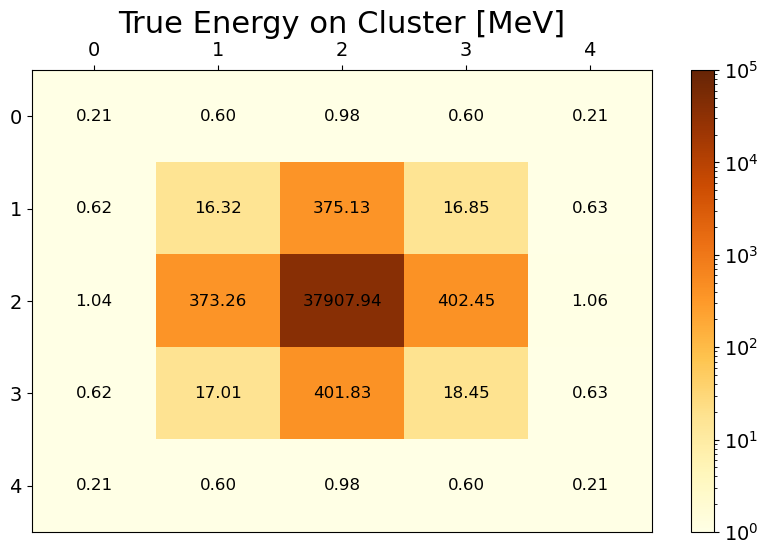

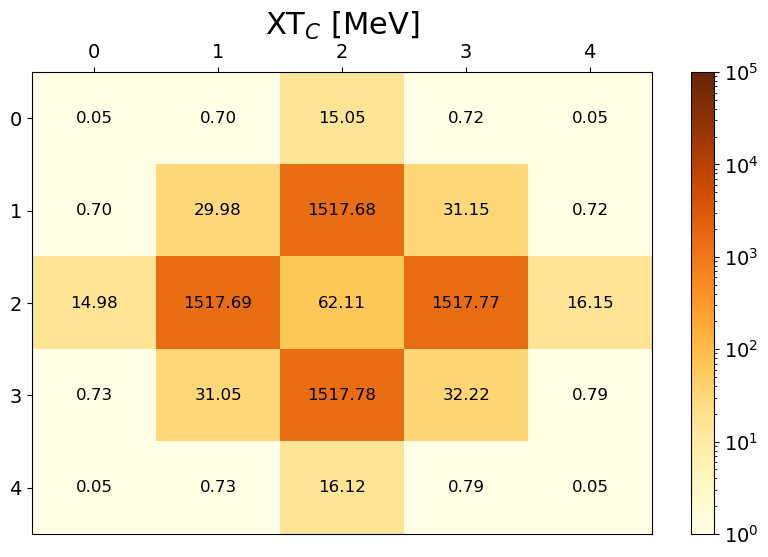

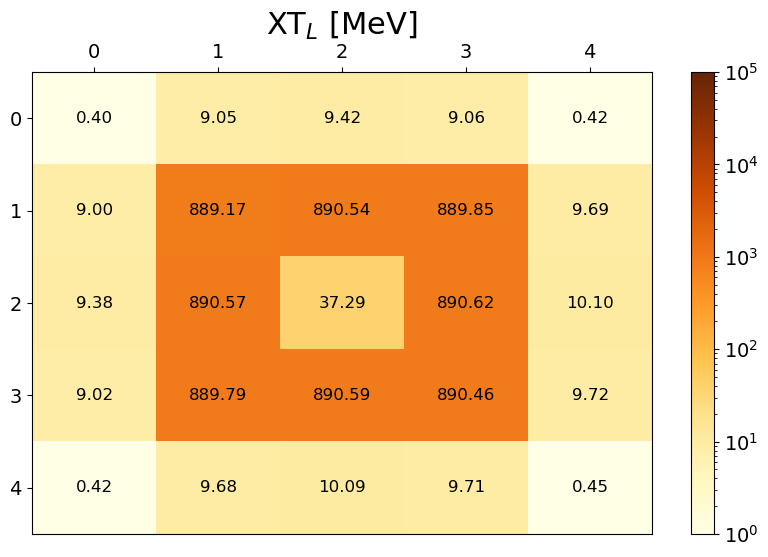

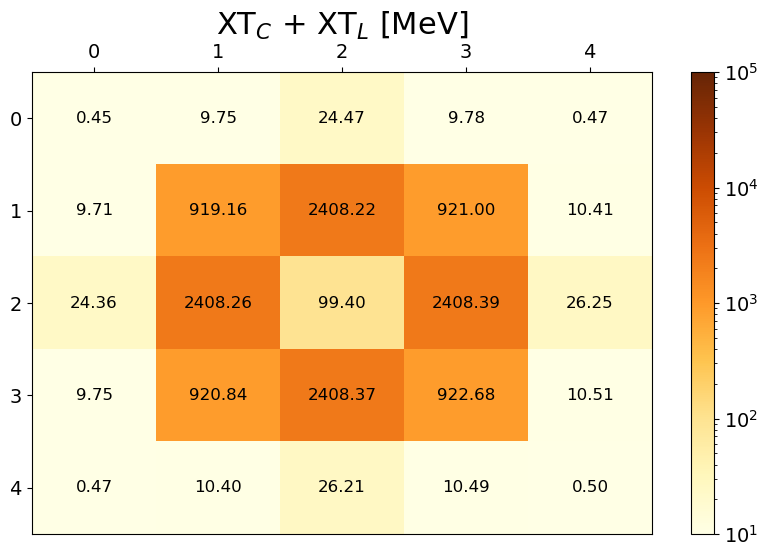

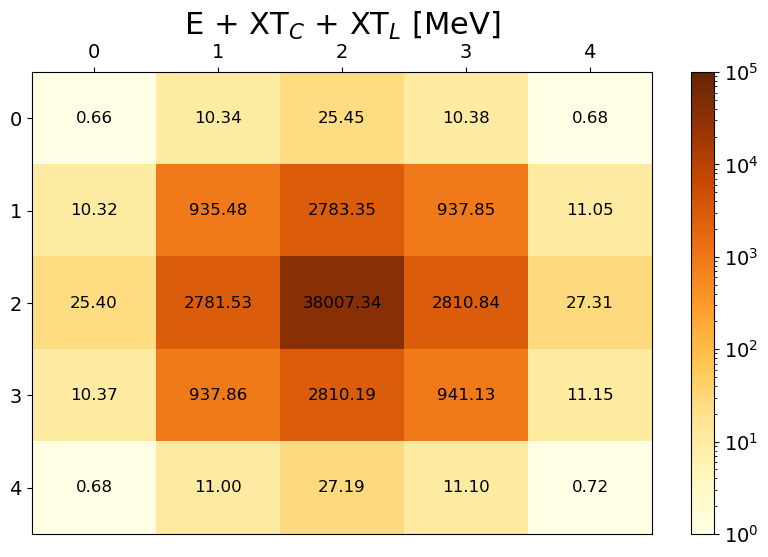

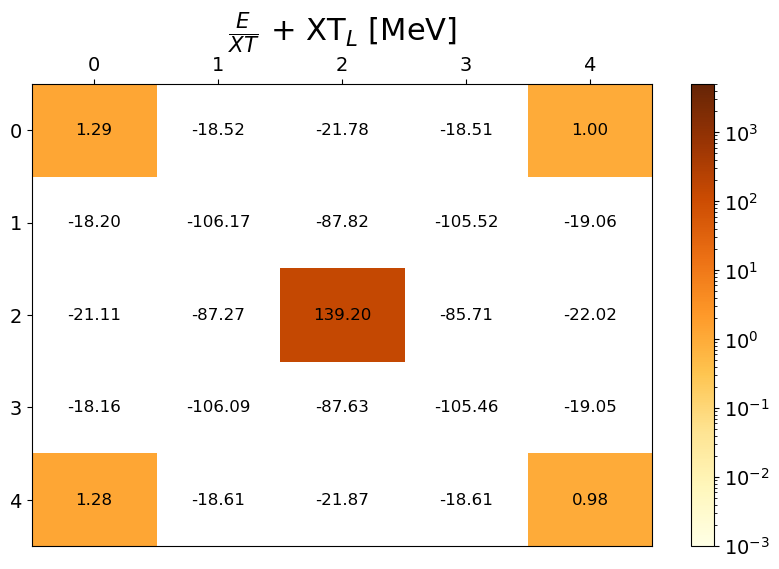

In [4]:
### (pathOut, data, title, fileName, show=False, precis=2)
ext = 'pdf'
vMin = 1
vMax = 1e5
histos = pathOut
save = False

title = f'True Energy on Cluster [MeV]'
fileName = f'Cluster5x5_EnergyTrue'
plotHeatmap(EtrueAmp.mean(axis=0), pathOut=histos, titleName=title, fileName=fileName, show=True, save=save, vMin=vMin, vMax=vMax, log=True)

title = f'XT${{_C}}$ [MeV]'
fileName = f'Cluster5x5_XTc'
plotHeatmap(XTcAmp.mean(axis=0), pathOut=histos, titleName=title, fileName=fileName, show=True, save=save, vMin=vMin, vMax=vMax, log=True)

title = f'XT${{_L}}$ [MeV]'
fileName = f'Cluster5x5_XTl'
plotHeatmap(XTlAmp.mean(axis=0), pathOut=histos, titleName=title, fileName=fileName, show=True, save=save, vMin=vMin, vMax=vMax, log=True)

title = f'XT${{_C}}$ + XT${{_L}}$ [MeV]'
fileName = f'Cluster5x5_XTcl'
plotHeatmap((XTcAmp+XTlAmp).mean(axis=0), pathOut=histos, titleName=title, fileName=fileName, show=True, save=save, vMin=10, vMax=vMax, log=True)

title = f'E + XT${{_C}}$ + XT${{_L}}$ [MeV]'
fileName = f'Cluster5x5_EXTc'
plotHeatmap((EtrueAmp + XTcAmp+XTlAmp).mean(axis=0), pathOut=histos, titleName=title, fileName=fileName, show=True, save=save, vMin=vMin, vMax=vMax, log=True)

title = r'$\frac{E}{XT}$ + XT${{_L}}$ [MeV]'
fileName = f'Cluster5x5_Ratio_EoverXTcl'
plotHeatmap(20*np.log(EtrueAmp/(XTcAmp+XTlAmp)).mean(axis=0), pathOut=histos, titleName=title, fileName=fileName,  show=True, save=save, vMin=0.001, vMax=5e3, log=True)

## Signals at cell: g(t) + xt(t)

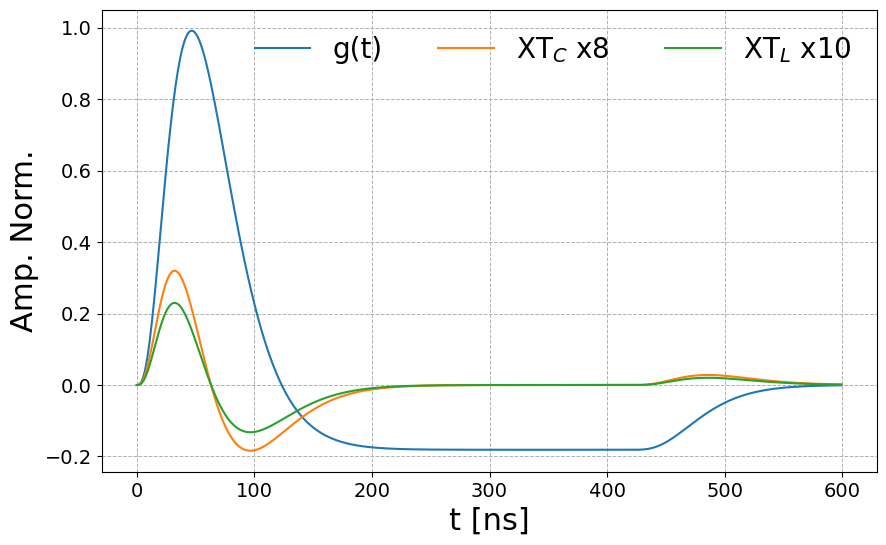

In [5]:
cellSignal = array([cellFunction(x) for x in range(600)])
xtalk      = array([XTalk(x) for x in range(600)])

plt.plot(cellSignal, label= 'g(t)')
plt.plot(xtalk*g_AmpXt_C*8, label=f'XT$_C$ x8')
plt.plot(xtalk*g_AmpXt_L*10, label=f'XT$_L$ x10')
plt.grid(ls="--", lw=0.7)
plt.legend(frameon=False, ncol=3)
plt.xlabel('t [ns]')
plt.ylabel('Amp. Norm.')
plt.show()

### Sampling signals

In [6]:
vectDelays = getIdxClus_mxn(cellsDelay, 7, 5)
nSamp = 4
tau_0 = 0   ## arbitray sampling delay used to validate analysis.

Etrue_samp = genCellSamples(vectDelays, tau_0, nSamp)*(np.repeat(EtrueAmp, nSamp, axis=1))
XTc_samp   = genXTcSamples(vectDelays, tau_0, nSamp)*(np.repeat(XTcAmp, nSamp, axis=1))
XTl_samp   = genXTlSamples(vectDelays, tau_0, nSamp)*(np.repeat(XTlAmp, nSamp, axis=1))
Noise      = array([genNoise( np.shape(Etrue_samp)[1]) for _ in range( np.shape(EtrueAmp)[0] )])

### Composed signal to estimate $\hat{E}$, and $\tau$ by OF

In [7]:
E_XTcl_noise = Etrue_samp + XTc_samp + XTl_samp + Noise

E_T_of = OptFilt(E_XTcl_noise)['Clusters'] 
E_T_targ = OptFilt(Etrue_samp)['Clusters'] 

## E and Time without XT
E_targ = E_T_targ['Amplitude']/1000
T_targ = E_T_targ['Time']

## E and Time with XT 
E_of = E_T_of['Amplitude']/1000
T_of = E_T_of['Time']


### Histograms for Total Energy, and men $\hat{\tau}$ in the $5\times5$ cluster.

save = True # Store the histogram as pdf
text list: additional information to clarify the plot information.

kwargs:
   - log: to show yScale in logarithm
   - adjustXlim: to adjust xlimits to show in a better way
   - nStd: to defines xLim variation if adjustXlim didn't show a good result



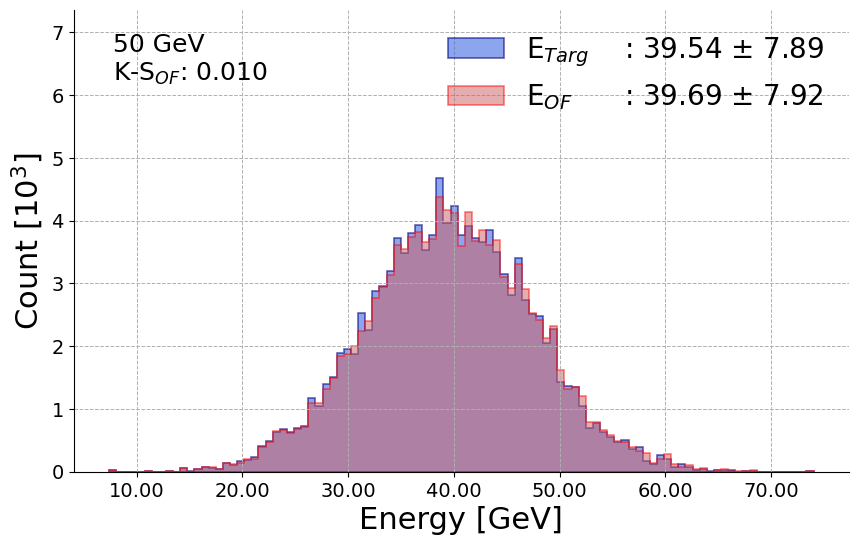

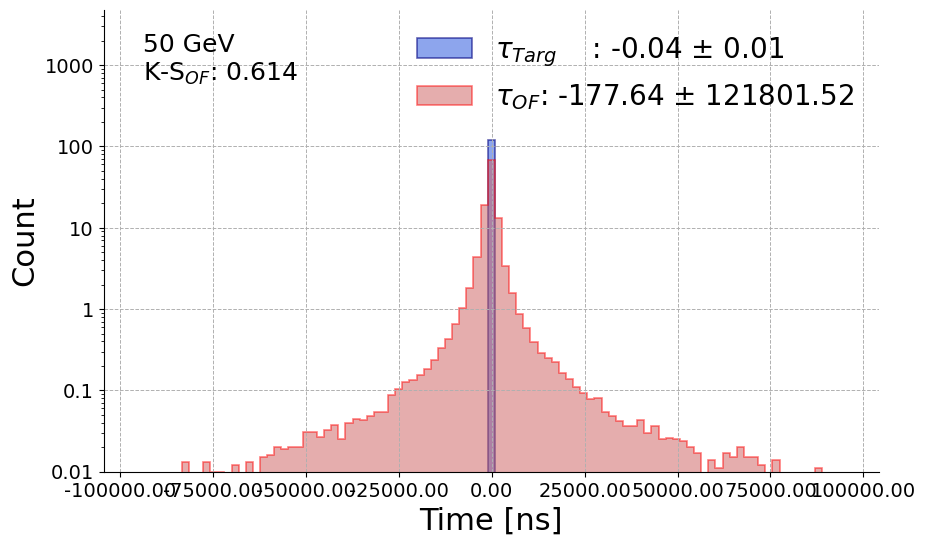

In [8]:
fileNameE  = f'hist_E_clus'
legendE = ['E$_{Targ}$', 'E$_{OF}$']

save=False
show=True

E_k_OF, _ = ks_2samp( E_targ.sum(axis=1),   E_of.sum(axis=1) )
T_k_OF, _ = ks_2samp( T_targ.sum(axis=1),   T_of.sum(axis=1) )
text=[f'50 GeV', f'K-S$_{{OF}}$: {E_k_OF:.3f}']

plotHisto(E_targ.sum(axis=1),   y2=E_of.sum(axis=1),   pathOut=pathOut, label='Energy', save=save, show=show, legend=legendE, unit='GeV',fileName=fileNameE, text=text )

fileNameT  = f'hist_T_clus'
text=[f'50 GeV', f'K-S$_{{OF}}$: {T_k_OF:.3f}']
legendT = [r'$\tau_{Targ}$', r'$\tau_{OF}$']

plotHisto(T_targ.mean(axis=1),  y2=T_of.sum(axis=1),   pathOut=pathOut, label='Time',   save=save, show=show, legend=legendT, unit='ns',fileName=fileNameT, text=text, adjustXlim=True, nStd=1.1, log=True )




### Scatter Targ x OF

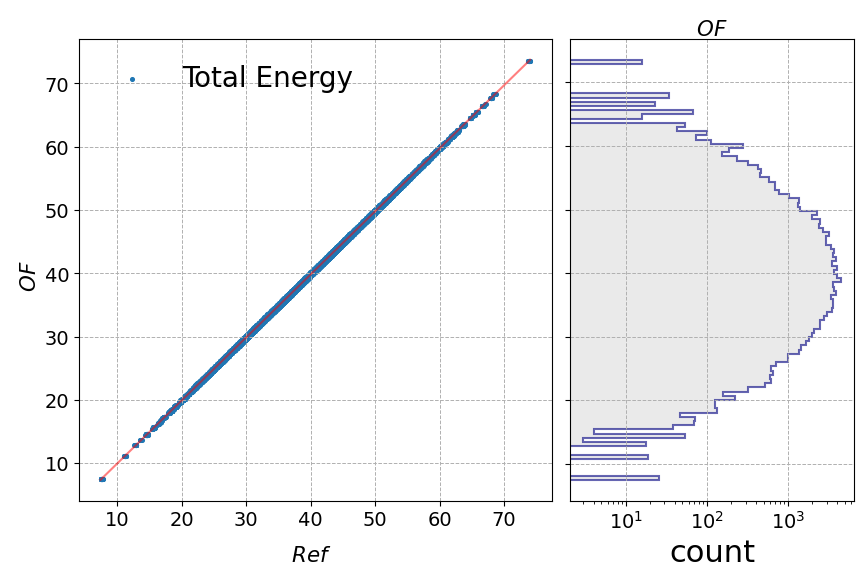

In [9]:
fileNameE  = f'hist_E_clus'
legendE = ['E$_{Targ}$', 'E$_{OF}$']

save=False
show=True

E_k_OF, _ = ks_2samp( E_targ.sum(axis=1),   E_of.sum(axis=1) )
T_k_OF, _ = ks_2samp( T_targ.sum(axis=1),   T_of.sum(axis=1) )
label = f'Total Energy'

plotScatter( E_targ.sum(axis=1), E_of.sum(axis=1), struct='OF',   fileName=fileName, save=save, show=show, pathOut=pathOut, label=label ) 

